# ASL images

## 1. Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow.keras as keras

In [3]:
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

In [4]:
print(train_df.shape)
print(valid_df.shape)

(27455, 785)
(7172, 785)


## 2. Look at the data

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
valid_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,9,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
# extract labels and images

y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

x_train = train_df.values
x_valid = valid_df.values

In [8]:
print(y_train.shape)
print(y_valid.shape)
print(x_train.shape)
print(x_valid.shape)

(27455,)
(7172,)
(27455, 784)
(7172, 784)


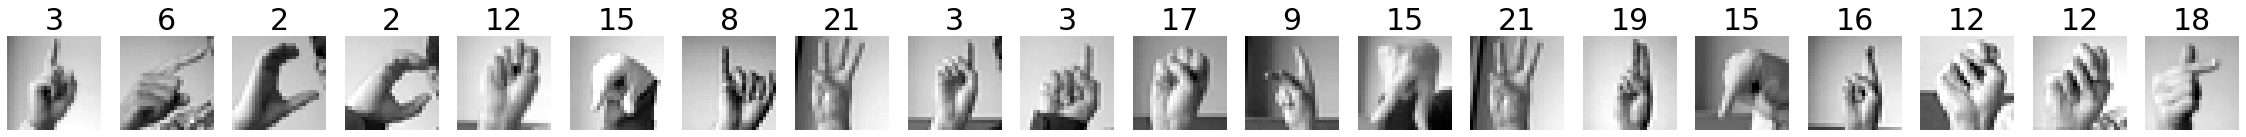

In [9]:
# visualize the data

import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]    
    image = row.reshape(28, 28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## 3. Pre-process the data

### 3a. Flatten

In [10]:
# already done

print(x_train.shape)
print(x_valid.shape)

(27455, 784)
(7172, 784)


### 3b. Normalize

In [11]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [12]:
x_train = x_train/255
x_valid = x_valid/255

In [13]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


### 3c. One-hot encode labels

In [14]:
y_train[:3]

0    3
1    6
2    2
Name: label, dtype: int64

In [15]:
y_valid[:3]

0    6
1    5
2    9
Name: label, dtype: int64

In [16]:
num_classes = 24

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [17]:
y_train[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_valid[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 4. Create the model

In [19]:
x_train.shape

(27455, 784)

In [20]:
num_classes

24

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()

# input layer
model.add(Dense(units=512, 
               activation='relu', 
               input_shape=[x_train.shape[1]]))

# hidden layer
model.add(Dense(units=512, 
               activation='relu'))

# output layer
model.add(Dense(units=num_classes, 
               activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 24)                12312     
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


2022-06-26 10:20:47.711971: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# compile model

model.compile(loss='categorical_crossentropy', 
             metrics=['accuracy'])

## 5. Train/fit the model

In [23]:
history = model.fit(x_train, y_train, 
                   epochs=20, 
                   verbose=1, 
                   validation_data=(x_valid, y_valid))

2022-06-26 10:20:48.409515: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
858/858 [==============================] - 11s 11ms/step - loss: 2.4739 - accuracy: 0.2508 - val_loss: 1.6457 - val_accuracy: 0.4665
Epoch 2/20
858/858 [==============================] - 8s 9ms/step - loss: 1.0614 - accuracy: 0.6391 - val_loss: 1.2289 - val_accuracy: 0.6240
Epoch 3/20
858/858 [==============================] - 6s 7ms/step - loss: 0.6416 - accuracy: 0.7811 - val_loss: 0.8315 - val_accuracy: 0.7433
Epoch 4/20
858/858 [==============================] - 7s 8ms/step - loss: 0.4168 - accuracy: 0.8593 - val_loss: 1.0981 - val_accuracy: 0.7246
Epoch 5/20
858/858 [==============================] - 7s 8ms/step - loss: 0.3053 - accuracy: 0.9070 - val_loss: 0.7880 - val_accuracy: 0.8081
Epoch 6/20
858/858 [==============================] - 7s 8ms/step - loss: 0.2432 - accuracy: 0.9310 - val_loss: 0.9643 - val_accuracy: 0.8010
Epoch 7/20
858/858 [==============================] - 7s 8ms/step - loss: 0.2151 - accuracy: 0.9441 - val_loss: 1.1086 - val_accuracy: 0.7528
Epoc

In [24]:
# list all data in history

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


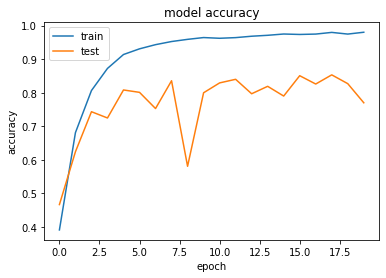

In [25]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

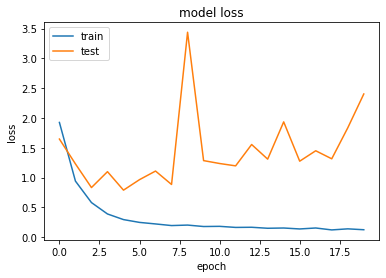

In [26]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6. Test the model on new data